Information/Variance in PC1 94.57223216899484


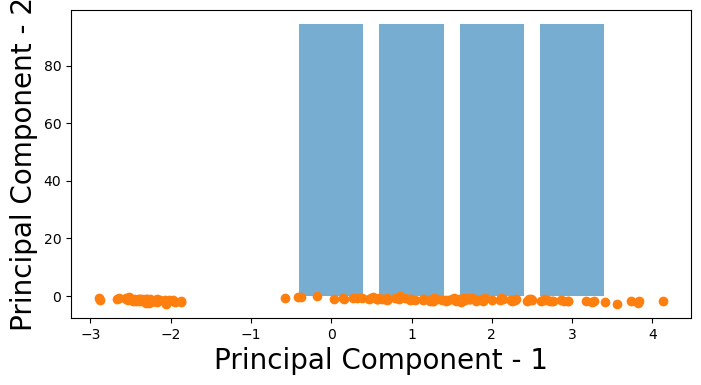

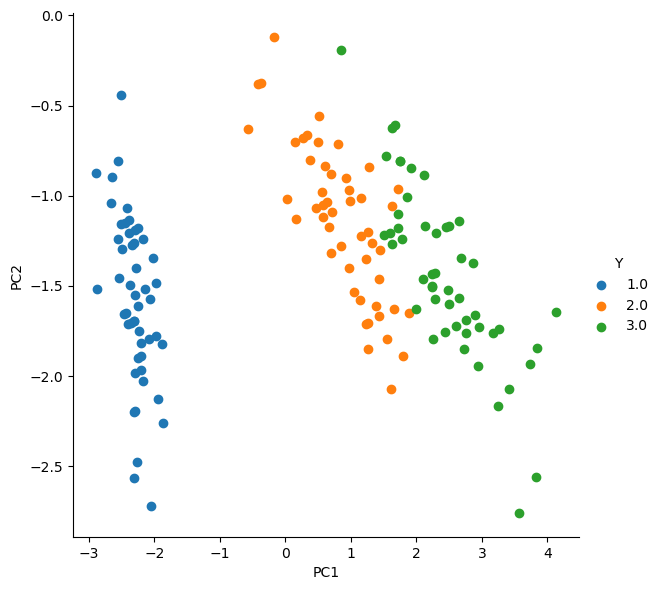

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")

X = df.values[:, :-1]
Y = df.values[:, -1]

X_standard = X - X.mean()
Y_standard = Y - Y.mean()

cov = np.cov(X_standard.T)
eigen_values, eigen_vectors = LA.eig(cov)

sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(), X_standard.transpose()).transpose()

print("Information/Variance in PC1", (sorted_eigenvalue[0] / (sorted_eigenvalue[0] + sorted_eigenvalue[1])) * 100)
variances=(sorted_eigenvalue[0] / (sorted_eigenvalue[0] + sorted_eigenvalue[1])) * 100
plt.figure(figsize=(8, 4))
plt.bar(range(4), variances, alpha=0.6)
plt.ylabel('Percentage of variance')
plt.xlabel('Dimensions')

plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.scatter(X_reduced[:, 0:1], X_reduced[:, -1])
plt.show()

projected_1 = X_reduced[:, 0]
projected_2 = X_reduced[:, 1]

res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y
res.head()

sns.FacetGrid(res, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

